# Exploratory Data Analysis

0) Access Data from Google Bigquery
1) Simple Investigation
2) Simple Plot
3) Check Properties
    1) Trend
    2) Seasonality
    3) Cycle

# 0) Access Data from Google Bigquery

In [1]:
# import api for access google bigquery
from google.cloud import bigquery as bq
# import for getting details for authentication and project id
import google.auth
# import pandas for data manipulation
import pandas as pd
# import numpy for data manipulation
import numpy as np
# import matplotlib for visualization
import matplotlib.pyplot as plt
# import pyfredapi for data info
import pyfredapi as pf
# import data list from another notebook
import Data_List

# call the data list from another .py
dict_data = Data_List.dict_data

# define a dictionary for store the dataframe of various financial data
dict_df = {}
# get project_id from json
credentials, project_id = google.auth.default()
database_id = 'data'
# Access data from google bigquery
client = bq.Client()
for data in dict_data:
    table_id = data
    sql = f'select * from {project_id}.{database_id}.{table_id}'
    # Save dataframe into a dictionary
    dict_df[data] = client.query(sql).to_dataframe().sort_values("date").set_index("date")

# 1) Simple Investigation

In [2]:
# Brief view of data
for data in dict_df:
    display(dict_df[data])

,FEDFUNDS
date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33


,TB3MS
date,
1954-07-01,0.72
1954-08-01,0.92
1954-09-01,1.01
1954-10-01,0.98
1954-11-01,0.93
...,...
2023-11-01,5.27
2023-12-01,5.24
2024-01-01,5.22


,UNRATE
date,
1954-07-01,5.8
1954-08-01,6.0
1954-09-01,6.1
1954-10-01,5.7
1954-11-01,5.3
...,...
2023-11-01,3.7
2023-12-01,3.7
2024-01-01,3.7


,CPIAUCSL
date,
1954-07-01,26.860
1954-08-01,26.850
1954-09-01,26.810
1954-10-01,26.720
1954-11-01,26.780
...,...
2023-11-01,308.024
2023-12-01,308.742
2024-01-01,309.685


,GDP
date,
1954-07-01,388.083333
1954-08-01,390.996000
1954-09-01,393.908667
1954-10-01,396.821333
1954-11-01,399.734000
...,...
2023-11-01,27956.998000
2023-12-01,28189.973000
2024-01-01,28422.948000


In [3]:
# define a function to check abnormality of data 
# incluing null value, duplicated index(date) and non-consecutive index(date)
def check_abnormality(df):
    print(df.columns[0])
    # check any null value
    print(f"""Number of null value: {
        df.isnull().sum().values[0]}""")
    # check any duplicated index
    print(f"""Number of duplicated index: {
        abs(len(set(df.index.values)) - len(df))}""")
    # check any non-consecutive index
    temp_df = df.copy()
    temp_df['year'] = temp_df.index.year
    temp_df['month'] = temp_df.index.month
    temp_df['sequence'] = ((temp_df['year'] - temp_df['year'].shift(1)) * 12 
                        + (temp_df['month'] - temp_df['month'].shift(1)))
    print(f"""Number of non-consecutive index: {
    abs(sum(temp_df['sequence'][1:] == 1) - (len(temp_df) - 1))}""")
    print()

In [4]:
# check abnormality of data
for data in dict_df:
    check_abnormality(dict_df[data])

FEDFUNDS
Number of null value: 0
Number of duplicated index: 0
Number of non-consecutive index: 0

TB3MS
Number of null value: 0
Number of duplicated index: 0
Number of non-consecutive index: 0

UNRATE
Number of null value: 0
Number of duplicated index: 0
Number of non-consecutive index: 0

CPIAUCSL
Number of null value: 0
Number of duplicated index: 0
Number of non-consecutive index: 0

GDP
Number of null value: 0
Number of duplicated index: 0
Number of non-consecutive index: 0



In [5]:
# No missing Month is found

# 2) Simple Plot

In [6]:
# Define a dictionary to store title and ylabel
dict_title = {}
dict_ylabel = {}
for data in dict_df:
    dict_title[data] = Data_List.dict_data[data]
    dict_ylabel[data] = pf.get_series_info(data).units

In [7]:
# Define a dictionary to store issue name, period (end date only), 
# location of issue text and location of arrow head
dict_issue_name = {
    '2020-01-01': 'COVID-19 \nPandemic',
    '2007-01-01': 'Subprime \nMortgage \nCrisis',
    '1998-01-01': 'Dot-Com \nBubble',
    '1986-01-01': 'Savings \n& Loan \nCrisis',
    '1979-01-01': '2nd Oil \nCrisis',
    '1973-10-01': '1st Oil \nCrisis',
    '1950-01-01': 'Post–World \nWar II \nEconomic \nExpansion'
}
dict_issue_period = {
    '2020-01-01': '2023-05-01',
    '2007-01-01': '2010-03-01',
    '1998-01-01': '2000-03-01',
    '1986-01-01': '1995-12-01',
    '1979-01-01': '1981-02-01',
    '1973-10-01': '1974-03-01',
    '1950-01-01': '1970-01-01'
}

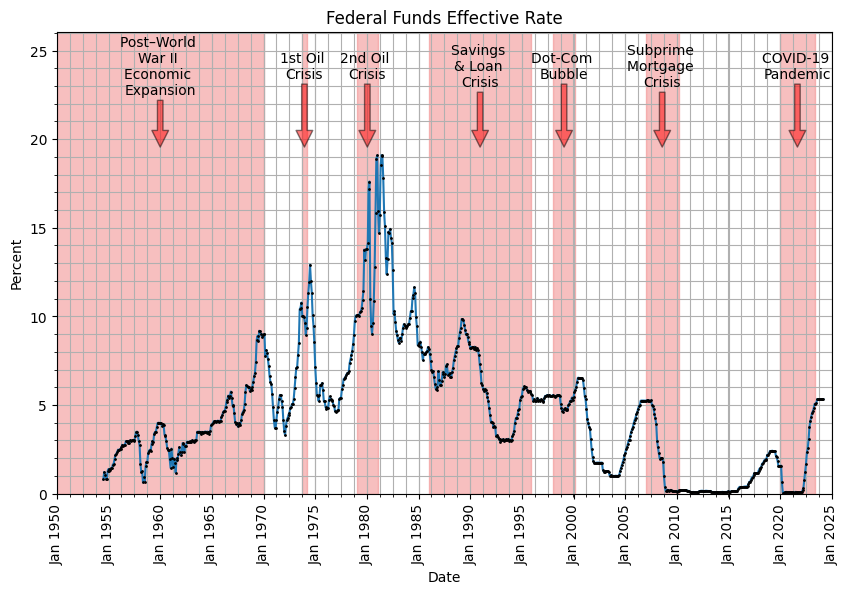

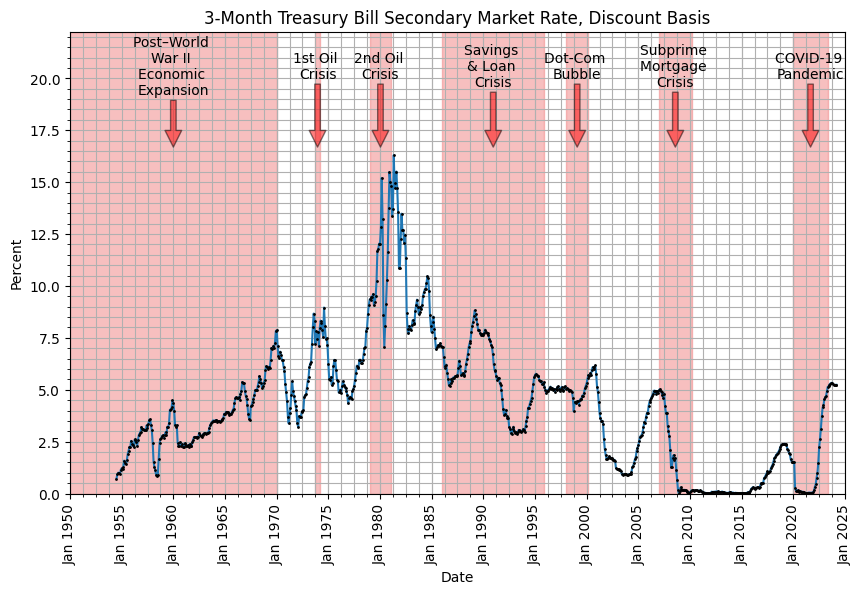

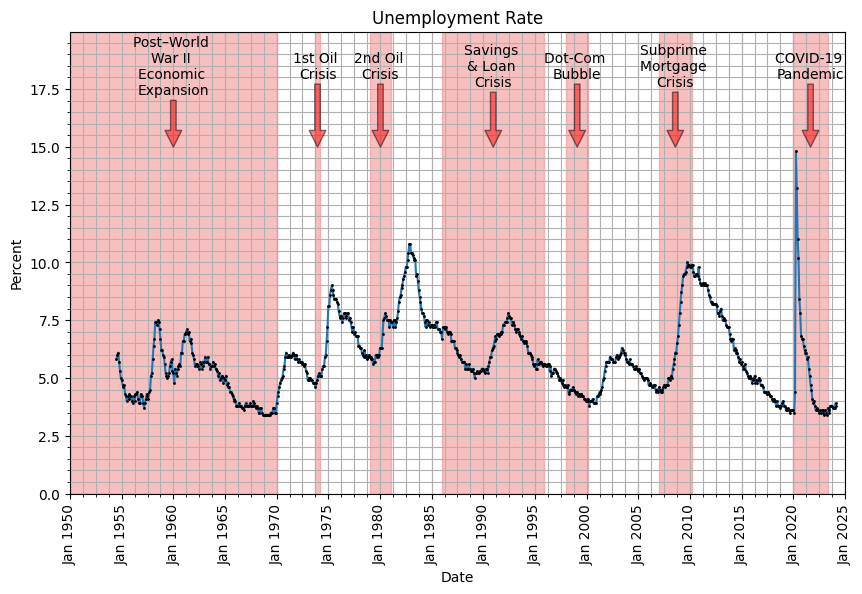

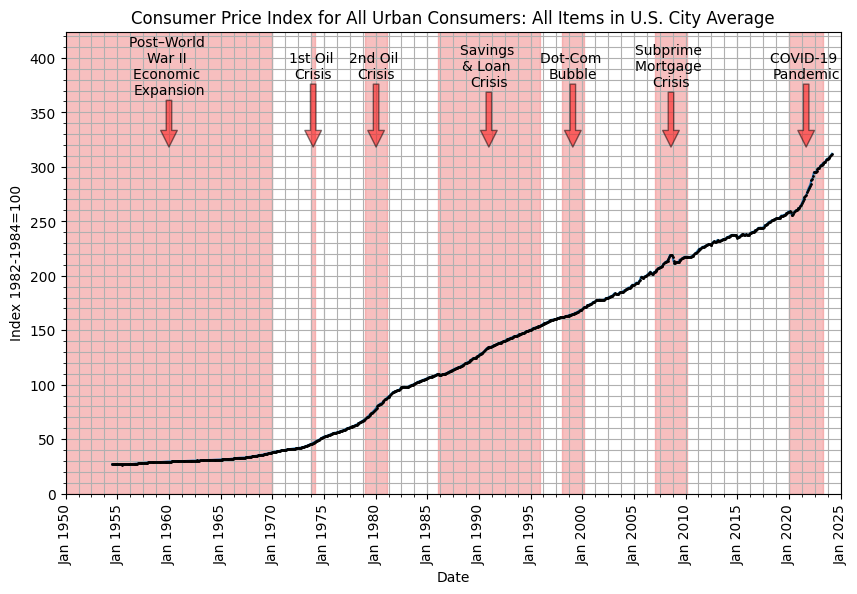

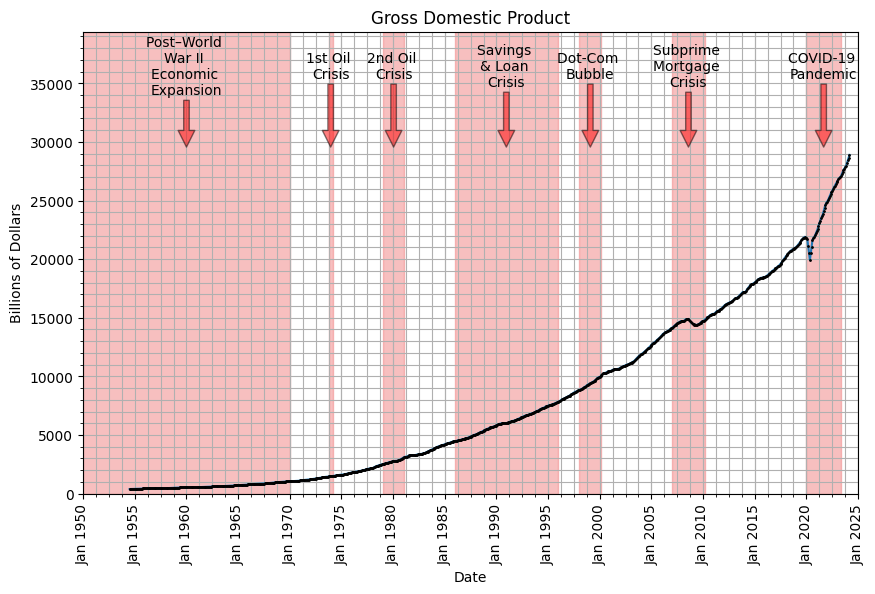

In [8]:
from matplotlib.ticker import AutoMinorLocator
for data in dict_df:
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(dict_df[data], marker='o', markersize=1, markerfacecolor='black', markeredgecolor='black')
    xticks_start = dict_df[data].index[0] - pd.offsets.DateOffset(years=5)
    xticks_end = dict_df[data].index[-1] + pd.offsets.DateOffset(years=5)
    xticks = pd.date_range(xticks_start, xticks_end, freq='5YS')
    xlabels = [i.strftime("%b %Y") for i in xticks]
    ax.set(title=dict_title[data],
           xlabel='Date',
           ylabel=dict_ylabel[data],
           xlim=(xticks[0], xticks[-1]), 
           ylim=(0, ax.get_ylim()[1] * 1.3))
    ax.set_xticks(xticks, xlabels, rotation=90, ha='center')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which='both')
    ylim = ax.get_ylim()[1]
    for date in dict_issue_name:
        date_middle = np.datetime64(date) + (np.datetime64(dict_issue_period[date]) - np.datetime64(date))/ 2
        ax.axvspan(date, dict_issue_period[date], color='lightcoral', alpha=0.5)
        ax.annotate(dict_issue_name[date],
                    xytext=(date_middle, 18.5 / 20 * ylim),
                    ha='center', 
                    va='center',
                    xycoords = 'data',
                    xy=(date_middle, 15 / 20 * ylim),
                    arrowprops=dict(facecolor='red', alpha=0.5))

# 3A) Check Properties - Trend

In [ ]:
plot_params = dict(marker='o', markersize=1, markerfacecolor='black', markeredgecolor='black', figsize=(10,6))

In [ ]:
def moving_average(df, start, stop, step):
    return pd.concat([df.rename(columns={df.columns[0]:f"MA{i}"}).rolling(i, center=True).mean() for i in range(start, stop, step)], axis=1)

In [ ]:
# Check Trend by Moving Average at 12,48,84,120,156
for data in dict_df:
    ax=dict_df[data].plot(**plot_params, 
                       title=dict_title[data],
                       ylabel=dict_ylabel[data],
                       xlabel='date (monthly)')
    moving_average(dict_df[data],12*5,12*5*5,12*5).plot(figsize=(10,6),ax=ax)

In [ ]:
# From Moving Average plot, a trend is discovered.
# The trend is like rising from begining to maximum near 1983 and dropping to minimum near 2013 and rising again.

In [ ]:
# Check Trend by adding time dummy and use Linear Regression to determine the order of Time Dummy
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
# Plot 3 figures which contain Federal Funds Effective Rate with 5 Orders of Time Dummy
number_fig = 3
fig, ax = plt.subplots(number_fig, figsize=(10, 18))
# Save Federal Funds Effective Rate as y to fit Linear Regression
y = dict_df["FEDFUNDS"]["FEDFUNDS"]
# Plot 3 figures one by one 
for i in range(number_fig):
    # Plot Federal Funds Effective Rate
    ax[i].plot(y, markeredgecolor="0.25", markerfacecolor="0.25", marker='.', label='FEDFUNDS')
    # Format setting for each plot
    ax[i].set(title=f'Fitting Time Dummy for order {i*5+1} to order {(i+1)*5} with FEDFUNDS',
              xlabel='date (monthly)',
              ylabel='rate (%)',
              ylim=(0,20))
    # Each plot contains Federal Funds Effective Rate and 5 orders of Time Dummy
    for j in range(i*5+1,(i+1)*5+1):
        # Generate Time Dummy with various order
        dp = DeterministicProcess(dict_df["FEDFUNDS"].index, order=j)
        X = dp.in_sample()
        # Fit various order into Linear Regression
        model = LinearRegression()
        model.fit(X, y)
        # Save prediction of various order in dataframe
        y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=[f'order {j}'])
        # Plot the prediction
        ax[i].plot(y_pred, label=f'order {j}')
        # Show the label
        ax[i].legend()

In [ ]:
# From Fitting Time Dummy figure, order 4 to 7 are likely the case

# 3B) Check Properties - Seasonality

In [ ]:
# Check Seasonlity
# Define a function to plot with various year as a complete cycle 
def Seasonaly_plot_freq(df, new_year, **kwarg):
    # copy from argument
    new_df = df.copy()
    # Extract Year and month from index for helper
    new_df['year'] = df.index.year
    new_df['month'] = df.index.month
    # Calculate new cycle
    new_df['new_year'] = new_df['year']//new_year*new_year
    new_df['new_month'] = (new_df['year'] - new_df['year']//new_year*new_year) * 12 + new_df['month']
    # Drop helper column
    new_df = new_df.drop(columns=['year','month'])
    # Pivot with new_year as each series and new_month as time pass
    new_df_pivot = new_df.pivot(index='new_month', columns='new_year')
    # Plot in line
    new_df_pivot.plot.line(**kwarg,
                           ylabel='rate (%)',
                           xlabel='step(s) in new cycle',
                           title=f'Seasonal Plot of complete cycle in {new_year} year')
    pass

In [ ]:
# Check if Seasonality appeared in 1 year up to 40 years
for i in [1,2,5,10,20,40]:
    Seasonaly_plot_freq(dict_df["FEDFUNDS"],i,legend=True if i >= 10 else False,figsize=(10,6))

In [ ]:
# No Obvious monthly Seasonality is found

# 3C) Check Properties - Cycle

In [ ]:
# Check cycle by acf and pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(10,6))
plot_acf(dict_df["FEDFUNDS"],lags=60, ax=ax);
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(dict_df["FEDFUNDS"],lags=60, ax=ax);

In [ ]:
# Check Cycle 

# define a function to create lag
def make_lags(ts, lags):
    return pd.concat({
            f'{ts.name}_lag_{i}': ts.shift(i) for i in range(1, lags + 1)
                    },axis=1)

In [ ]:
# Check Cycle by lag_plot
from scipy.stats import linregress
lag = 60

FEDFUNDS_lag = make_lags(dict_df["FEDFUNDS"]["FEDFUNDS"],lag)
row = 15
col = lag // row
fig, ax = plt.subplots(row, col, sharey=True, figsize=(col*5,row*5), constrained_layout=True)
fig.suptitle('Lag plot of Federal Funds Effective Rate with autocorrelations indicated.')

for i in range(1, row+1):
    for j in range(1, col+1):
        x = FEDFUNDS_lag.iloc[:,j+(i-1)*col-1].fillna(0)
        y = dict_df["FEDFUNDS"]["FEDFUNDS"]
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        if col == 1:
            index = i-1
        else:
            index = i-1, j-1
        ax[index].scatter(x, y, s=10, alpha=0.5)
        ax[index].plot(x, slope*x + intercept, c='red')
        ax[index].set(xlabel="Federal Funds Effective Rate", 
                      ylabel="Federal Funds Effective Rate", 
                      title=f'Lag {j+(i-1)*col}')
        ax[index].text(0, 18, f"R^2={round(r_value,3)}",
                       size=15, 
                       bbox=dict(boxstyle="square,pad=0.3", fc="lightblue", ec="steelblue", lw=2))

In [ ]:
# Check Cycle by lag_plot
from scipy.stats import linregress
lag = 8
for data in dict_df:
    temp_lag = make_lags(dict_df[data].iloc[:,0],lag)
    temp_lag = dict_df["FEDFUNDS"].join(temp_lag).iloc[:,1:]
    
    row = 2
    col = lag // row
    fig, ax = plt.subplots(row, col, sharey=True, figsize=(col*5,row*5), constrained_layout=True)
    fig.suptitle(f'Lag plot of {dict_title[data]} with Federal Funds Effective Rate.')
    
    for i in range(1, row+1):
        for j in range(1, col+1):
            x = temp_lag.iloc[:,j+(i-1)*col-1].fillna(0)
            y = dict_df["FEDFUNDS"]["FEDFUNDS"]
            slope, intercept, r_value, p_value, std_err = linregress(x,y)
            if col == 1:
                index = i-1
            else:
                index = i-1, j-1
            ax[index].scatter(x, y, s=10, alpha=0.5)
            ax[index].plot(x, slope*x + intercept, c='red')
            ax[index].set(xlabel=dict_title[data], 
                          ylabel="Federal Funds Effective Rate", 
                          title=f'Lag {j+(i-1)*col}')
            ax[index].text(0, 18, f"R^2={round(r_value,3)}",
                           size=15, 
                           bbox=dict(boxstyle="square,pad=0.3", fc="lightblue", ec="steelblue", lw=2))
            

In [ ]:
def pct_change_plot(target_df, data_df, unit, number_of_pic):
    for i in range(unit, unit*(number_of_pic+1) ,unit):
        temp_df = data_df.copy()
        temp_df['x'] = temp_df / temp_df.shift(i)
        temp_combine = temp_df[['x']].join(target_df).dropna()
        x = temp_combine['x']
        y = temp_combine.iloc[:,-1]
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        fig,ax =plt.subplots(figsize=(10,6), constrained_layout=True)
        ax.plot(x, x*slope + intercept, c='red')
        ax.scatter(x, y,s=10, alpha=0.5)
        ax.set(xlabel=f'{data_df.columns[0]}', ylabel=f'{target_df.columns[0]}', title=f'Shift = {i}')
        ax.text(x.min(), y.max(), f"R^2={round(r_value,3)}",
                               size=15, 
                               bbox=dict(boxstyle="square,pad=0.3", fc="lightblue", ec="steelblue", lw=2))
    

In [ ]:
pct_change_plot(dict_df["FEDFUNDS"],dict_df["CPIAUCSL"],12,30)

# 3D) Check Properties - Stationarity

In [ ]:
# Check Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
# If p-value is less than 0.05, the series is statistically stationary.
check_stationarity(dict_df["FEDFUNDS"])

In [ ]:
# Determine frequencies
f = np.fft.fftfreq(len(dict_df["FEDFUNDS"])) * 1

# Compute power spectral density
psd = np.abs(np.fft.fft(dict_df["FEDFUNDS"].values))**2 / len(dict_df["FEDFUNDS"])

# Make plot
plt.plot(f[f>=0], psd[f>=0])
plt.xlabel('freq (Hz)')
plt.ylabel('PSD')
plt.margins(0.02)

In [ ]:
# Detrend with Time Dummy in order 7

y = dict_df["FEDFUNDS"]["FEDFUNDS"]

dp = DeterministicProcess(dict_df["FEDFUNDS"].index, order=7)
X = dp.in_sample()

model = LinearRegression()
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=[f'order {7}'])

ax = y.plot(alpha=0.5, style=".-", color="steelblue",markeredgecolor="0.25", markerfacecolor="0.25", figsize=(10,7))
ax = y_pred.plot(ax=ax)

In [ ]:
y_detrend = y_pred.join(y)

In [ ]:
y_detrend['detrend'] = y_detrend['FEDFUNDS'] - y_detrend['order 7']

In [ ]:
ax = plot_periodogram(dict_df["FEDFUNDS"]["FEDFUNDS"])
plot_periodogram(y_detrend['detrend'], ax=ax)

In [ ]:
ax = y.plot(alpha=0.5, style=".-", color="steelblue",markeredgecolor="0.25", markerfacecolor="0.25", figsize=(10,7))
ax = y_detrend['detrend'].plot(ax=ax, color='red')

In [ ]:
y_detrend['month'] = y_detrend.index.month
y_detrend['year'] = y_detrend.index.year

In [ ]:
seasonal_plot(y_detrend, y='detrend', period='year',freq='month')